In [177]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [178]:
data = pd.read_excel('data/Data_Train.xlsx')

In [179]:
data.shape

(10683, 11)

In [180]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [181]:
data.sort_values('Price')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10513,SpiceJet,27/03/2019,Mumbai,Hyderabad,BOM → HYD,05:45,07:05,1h 20m,non-stop,No info,1759
4066,SpiceJet,21/03/2019,Mumbai,Hyderabad,BOM → HYD,22:45,00:10 22 Mar,1h 25m,non-stop,No info,1759
4274,SpiceJet,27/03/2019,Mumbai,Hyderabad,BOM → HYD,22:45,00:10 28 Mar,1h 25m,non-stop,No info,1759
4839,SpiceJet,3/04/2019,Mumbai,Hyderabad,BOM → HYD,22:45,00:15 02 Apr,1h 30m,non-stop,No info,1759
1513,Jet Airways,27/03/2019,Mumbai,Hyderabad,BOM → HYD,02:55,04:25,1h 30m,non-stop,In-flight meal not included,1840
...,...,...,...,...,...,...,...,...,...,...,...
5439,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,16:55,23:00,6h 5m,1 stop,No info,54826
2618,Jet Airways,18/03/2019,Banglore,New Delhi,BLR → BOM → DEL,22:50,05:05 16 Mar,6h 15m,1 stop,No info,54826
10364,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → MAA → DEL,09:45,14:25,4h 40m,1 stop,Business class,57209
5372,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,12:25,6h 40m,1 stop,Business class,62427


In [182]:
data.Airline.value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [183]:
df = data.copy()

In [184]:
# convert column names to lowercase

In [185]:
df.columns = df.columns.str.lower()

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   airline          10683 non-null  object
 1   date_of_journey  10683 non-null  object
 2   source           10683 non-null  object
 3   destination      10683 non-null  object
 4   route            10682 non-null  object
 5   dep_time         10683 non-null  object
 6   arrival_time     10683 non-null  object
 7   duration         10683 non-null  object
 8   total_stops      10682 non-null  object
 9   additional_info  10683 non-null  object
 10  price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [187]:
df.isna().sum()

airline            0
date_of_journey    0
source             0
destination        0
route              1
dep_time           0
arrival_time       0
duration           0
total_stops        1
additional_info    0
price              0
dtype: int64

In [188]:
df[df.route.isnull()]

,airline,date_of_journey,source,destination,route,dep_time,arrival_time,duration,total_stops,additional_info,price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [189]:
# dropping a row with nan values

In [190]:
df.dropna(inplace=True)

In [191]:
# converting multiple airlines value which seem as duplicate and delete one occurence

In [192]:
df.airline.value_counts()

airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [193]:
df['airline'] = df.airline.str.replace('Multiple carriers Premium economy', 'Multiple carriers')
df['airline'] = df.airline.str.replace('Jet Airways Business', 'Jet Airways')
df['airline'] = df.airline.str.replace('Vistara Premium economy', 'Vistara')

df.drop(df[df.airline == 'Trujet'].index, inplace=True)


In [194]:
df.source.unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [195]:
df.destination.unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [196]:
df['destination'] = df.destination.str.replace('New Delhi', 'Delhi')

In [197]:
# split date_of_journey columns

In [198]:
df[['day', 'month']] = df.date_of_journey.str.split('/', expand=True).iloc[:, :2]

In [199]:
# fix mixing data in Arrival_Time

In [200]:
df['arrival_time'] = df.arrival_time.str.split(' ', expand=True).iloc[:, 0]

In [201]:
df.head(1)

,airline,date_of_journey,source,destination,route,dep_time,arrival_time,duration,total_stops,additional_info,price,day,month
0,IndiGo,24/03/2019,Banglore,Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897,24,03


In [202]:
# change non-stop to 0 stop

In [203]:
df['total_stops'] = df.total_stops.str.replace('non-stop', '0 stop')

In [204]:
# delete 4 stops

In [205]:
df.total_stops.unique()

array(['0 stop', '2 stops', '1 stop', '3 stops', '4 stops'], dtype=object)

In [206]:
df.drop(df[df.total_stops == '4 stops'].index, inplace=True)

In [207]:
# take total stops numeric only

In [208]:
df['total_stops'] = df.total_stops.str.split().str[0]

In [209]:
# drop unused features

In [210]:
df.drop(['date_of_journey', 'route', 'duration', 'additional_info', 'day', 'month'], axis=1, inplace=True)

In [211]:
# split data to X and y

In [212]:
X = df.drop('price', axis=1)
y = df.price

In [213]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [214]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10680 entries, 0 to 10682
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   airline       10680 non-null  object
 1   source        10680 non-null  object
 2   destination   10680 non-null  object
 3   dep_time      10680 non-null  object
 4   arrival_time  10680 non-null  object
 5   total_stops   10680 non-null  object
dtypes: object(6)
memory usage: 584.1+ KB


In [215]:
X.head()

,airline,source,destination,dep_time,arrival_time,total_stops
0,IndiGo,Banglore,Delhi,22:20,01:10,0
1,Air India,Kolkata,Banglore,05:50,13:15,2
2,Jet Airways,Delhi,Cochin,09:25,04:25,2
3,IndiGo,Kolkata,Banglore,18:05,23:30,1
4,IndiGo,Banglore,Delhi,16:50,21:35,1


In [216]:
# calculate total flight hours

In [217]:
# from sklearn.base import BaseEstimator, TransformerMixin
# from datetime import timedelta
# import pandas as pd

# class FeatureEngineer(BaseEstimator, TransformerMixin):
#     def fit(self, X, y=None):
#         return self

#     def transform(self, X):
#         X = X.copy()

#         # Convert times to datetime (without date)
#         X['dep_time_dt'] = pd.to_datetime(X['dep_time'], format='%H:%M')
#         X['arr_time_dt'] = pd.to_datetime(X['arrival_time'], format='%H:%M')

#         # Compute duration
#         def compute_duration(row):
#             dep_time = row['dep_time_dt']
#             arr_time = row['arr_time_dt']
#             if arr_time < dep_time:
#                 arr_time += timedelta(days=1)

#             total_seconds = (arr_time - dep_time).total_seconds()
#             hours = int(total_seconds // 3600)
#             minutes = int((total_seconds % 3600) // 60)
#             return pd.Series([hours, minutes])

#         X[['duration_hour', 'duration_minute']] = X.apply(compute_duration, axis=1)

#         # Categorize departure time
#         def categorize_dep_time(dep_time):
#             hour = dep_time.hour
#             if 0 <= hour < 6:
#                 return 'Early Morning'
#             elif 6 <= hour < 12:
#                 return 'Morning'
#             elif 12 <= hour < 17:
#                 return 'Afternoon'
#             elif 17 <= hour < 21:
#                 return 'Evening'
#             else:
#                 return 'Night'

#         X['dep_time_category'] = X['dep_time_dt'].apply(categorize_dep_time)

#         # Drop original and helper columns
#         X.drop(['dep_time', 'arrival_time', 'dep_time_dt', 'arr_time_dt'], axis=1, inplace=True)

#         return X


In [218]:
from feature_engineering import FeatureEngineer

In [219]:
fe = FeatureEngineer()
result = fe.transform(X)

result

,airline,source,destination,total_stops,duration_hour,duration_minute,dep_time_category
0,IndiGo,Banglore,Delhi,0,2,50,Night
1,Air India,Kolkata,Banglore,2,7,25,Early Morning
2,Jet Airways,Delhi,Cochin,2,19,0,Morning
3,IndiGo,Kolkata,Banglore,1,5,25,Evening
4,IndiGo,Banglore,Delhi,1,4,45,Afternoon
...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,2,30,Evening
10679,Air India,Kolkata,Banglore,0,2,35,Evening
10680,Jet Airways,Banglore,Delhi,0,3,0,Morning
10681,Vistara,Banglore,Delhi,0,2,40,Morning


In [220]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10680 entries, 0 to 10682
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   airline            10680 non-null  object
 1   source             10680 non-null  object
 2   destination        10680 non-null  object
 3   total_stops        10680 non-null  object
 4   duration_hour      10680 non-null  int64 
 5   duration_minute    10680 non-null  int64 
 6   dep_time_category  10680 non-null  object
dtypes: int64(2), object(5)
memory usage: 667.5+ KB


In [221]:
# [(i, X[i].nunique(), np.sort(X[i].unique())) for i in X.columns if X[i].nunique() < 10]

In [222]:
categorical_features = ['airline', 'source', 'destination', 'dep_time_category']
numerical_features = ['total_stops', 'duration_hour', 'duration_minute']

# X[numerical_features] = X[numerical_features].apply(pd.to_numeric)

In [223]:
numerical_pipeline = Pipeline([
    ('scaler', StandardScaler())
])
categorical_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [224]:
preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_features),
    ('cat', categorical_pipeline, categorical_features)
])

In [225]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [226]:
models = {
    # 'linear_regression': LinearRegression(),
    'random_forest_regressor': RandomForestRegressor()
}

In [227]:
from sklearn.model_selection import cross_val_score

In [228]:
best_score = -np.inf
best_name = None
best_pipeline = None

for name, model in models.items():
    pipeline = Pipeline([
        ('feature_engineering', FeatureEngineer()),
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    scores = cross_val_score(pipeline, X, y, cv=5, scoring='neg_mean_squared_error')
    mean_score = np.mean(scores)

    print(name, mean_score)

    if mean_score > best_score:
        best_score = mean_score
        best_name = name
        best_pipeline = pipeline

print(best_name, best_score)

random_forest_regressor -9014089.302338336
random_forest_regressor -9014089.302338336


In [229]:
from sklearn.model_selection import train_test_split

In [230]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [231]:
best_pipeline.fit(X_train, y_train)

Pipeline(steps=[('feature_engineering', FeatureEngineer()),
                ('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['total_stops',
                                                   'duration_hour',
                                                   'duration_minute']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['airline', 'source',
                                                   'destination',
                                                   'dep_time_category'])])),
                ('model', RandomForestRegressor())])

In [232]:
# Apply feature engineering
X_fe = best_pipeline.named_steps['feature_engineering'].transform(X)

# Apply preprocessing (e.g., scaling, encoding, imputation)
X_transformed = best_pipeline.named_steps['preprocessor'].transform(X_fe)

In [233]:
pd.DataFrame(X_transformed.toarray())

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,-1.216855,-0.890934,1.275810,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.731423,-0.111138,-0.194119,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.731423,1.760372,-1.664048,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.257284,-0.423056,-0.194119,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.257284,-0.579015,0.981824,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10675,-1.216855,-0.890934,0.099867,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10676,-1.216855,-0.890934,0.393853,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10677,-1.216855,-0.734975,-1.664048,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10678,-1.216855,-0.890934,0.687839,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [234]:
y_pred = best_pipeline.predict(X_test)

In [235]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, root_mean_squared_error

In [236]:
mean_absolute_error(y_test, y_pred)

1731.4911498816307

In [237]:
mean_absolute_percentage_error(y_test, y_pred)

0.18934363105978644

In [238]:
root_mean_squared_error(y_test, y_pred)

3092.8388369531694

<Axes: xlabel='price', ylabel='Count'>

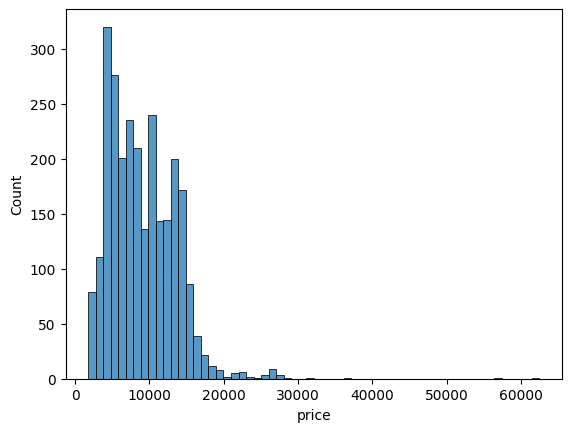

In [239]:
sns.histplot(y_test)

In [240]:
data.iloc[500:501,:]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
500,IndiGo,9/06/2019,Banglore,Delhi,BLR → DEL,07:10,10:05,2h 55m,non-stop,No info,4823


In [241]:
X.iloc[500:501,:]

,airline,source,destination,dep_time,arrival_time,total_stops
500,IndiGo,Banglore,Delhi,07:10,10:05,0


In [242]:
best_pipeline.predict(X.iloc[500:501,:])

array([5482.77002035])

In [243]:
residuals = y_test - y_pred

In [244]:
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x=y_test, y=residuals, alpha=0.5)
# plt.axhline(0, color='red', linestyle='--', linewidth=1)
# plt.xlabel("True Price")
# plt.ylabel("Residual (True - Predicted)")
# plt.title("Residuals vs. True Values")
# plt.grid(True)
# plt.show()

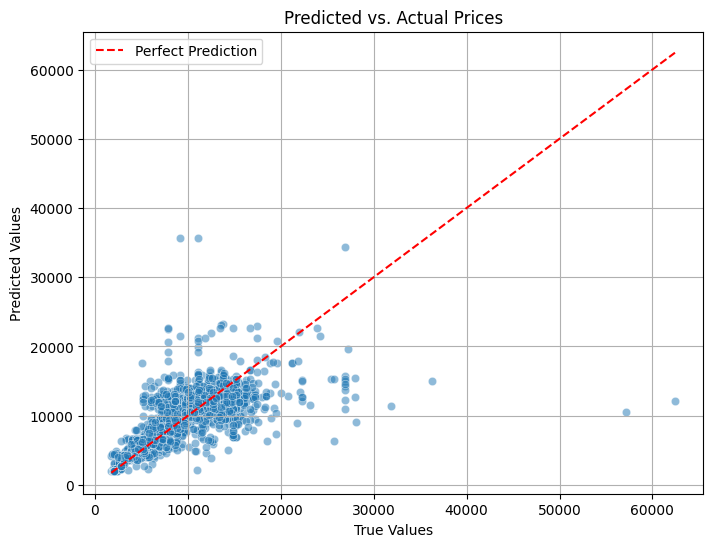

In [245]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual Prices")
plt.legend()
plt.grid(True)
plt.show()

In [246]:
import joblib

joblib.dump(best_pipeline, 'model.joblib')

['model.joblib']

In [247]:
best_pipeline

Pipeline(steps=[('feature_engineering', FeatureEngineer()),
                ('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['total_stops',
                                                   'duration_hour',
                                                   'duration_minute']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['airline', 'source',
                                                   'destination',
                                                   'dep_time_category'])])),
                ('model', RandomForestRegressor())])